<div class="head0">
    <div class="head0__name">
        Equation with const drift in 1D case
    </div>
    <div class="head0__note">
        Solution of the 1D Fokker-Planck equation with const drift (and known analytic solution) in standard numpy format.
    </div>
</div>
<div class="note">
    The final solution is not vanish on the boundary, hence we have significant integral error on the gridю At the same time, on the inner grid points solution is very accurate.
</div>

In [1]:
import sys

import numpy as np

sys.path.extend(['./../lib', './../helpers'])
from solver import Solver
from solvers_check import SolversCheck
from helpers import init_jupyter

data_path = './data/eq-1d_drift-const_analyt'
init_jupyter()

Start |  1:39PM MSK on Sep 11, 2019 |
-------------------------------------


<div class="head1">
    <div class="head1__name">
        Model problem
    </div>
</div>

Consider
$$
    d x = f(x, t) \, dt + S(x, t) \, d \beta,
    \quad
    d \beta \, d \beta^{\top} = Q(t) dt,
    \quad
    x(0) = x_0 \sim \rho(x, 0) = \rho_0 (x),
$$
$$
    \frac{\partial \rho(x, t)}{\partial t} =
        \sum_{i=1}^d \sum_{j=1}^d
            \frac{\partial^2}{\partial x_i \partial x_j}
            \left[ D_{ij}(x, t) \rho(x, t) \right]
        - \sum_{i=1}^d
            \frac{\partial}{\partial x_i}
            \left[ f_i(x, t) \rho(x, t) \right],
    \quad
     D(x, t) = \frac{1}{2} S(x, t) Q(t) S(x, t)^{\top},
$$
where spatial $d$-dimensional ($d \ge 1$) variable $x \in R^d$ has probability density function (PDF) $\rho(x, t)$, $\beta$ is Brownian motion of dimension $q$ ($q \ge 1$, and we assume below that $q = d$), $f(x, t) \in R^d$ is a vector-function, $S(x, t) \in R^{d \times q}$ and $Q(t) \in R^{q \times q}$ are matrix-functions and $D(x, t) \in R^{d \times d}$ is a diffusion tensor.

Let
$$
    Q(t) \equiv I,
    \,
    S(x, t) \equiv 0.2 I
    \implies
    D(x, t) \equiv 0.02 I,
$$
and
$$
    d = 1,
    \quad
    x \in \Omega,
    \quad
    \rho(x, t) |_{\partial \Omega} \approx 0,
    \quad
    f(x, t) \equiv v,
    \quad
    \rho_0(x) = \frac{1}{\sqrt{2 \pi s}}\exp{\left[-\frac{x^2}{2s}\right]}.
$$

This equation has exact solution ([see this paper](http://www.icmp.lviv.ua/journal/zbirnyk.73/13002/art13002.pdf); note that there is a typo in the paper for this formula: $\pi$ is missed!)
$$
    \rho(x, t, x_0) =
        \frac{1}{\sqrt{4 \pi D t}}
        \exp{\left[
            - \frac
                {
                    \left( x - x_0 - v t \right)^2
                }
                {
                    4 D t
                }
        \right]},
$$
where $x_0$ is an initial condition.

We can rewrite the solution $\rho(x, t, x_0)$ in terms of the initial PDF $\rho_0(x)$ as
$$
    \rho(x, t) = \int_{-\infty}^{\infty}
        \rho(x, t, x_0) \rho_0(x_0) \, d x_0,
$$
which after accurate computations leads to the following analytic solution
$$
    \rho(x, t) =
        \frac
            {
                1
            }
            {
                \sqrt{2 \pi s + 4 \pi D t}
            }
        \exp{ \left[
            - \frac
                {
                    (x - vt)^2
                }
                {
                    2  s + 4 D t
                }
        \right] },
$$
and the stationary solution ($t \rightarrow \infty$) is
$$
    \rho_{stat}(x) = 0.
$$

In [2]:
def func_f0(x, t):
    return v_coef * np.ones(x.shape)

def func_f1(x, t):
    return np.zeros(x.shape)

def func_r0(x):
    a = 2. * s_coef
    r = np.exp(-x * x / a) / np.sqrt(np.pi * a)
    return r.reshape(-1)

def func_rt(x, t):
    a = 2. * s_coef + 4. * D_coef * t
    r = np.exp(-(x - v_coef * t)**2 / a) / np.sqrt(np.pi * a)
    return r.reshape(-1)

def func_rs(x):
    r = np.zeros(x.shape)
    return r.reshape(-1)

<div class="head1">
    <div class="head1__name">
        Parameters
    </div>
</div>

In [3]:
s_coef = 0.1
v_coef = 1.
D_coef = 0.02
t_min, t_max, t_poi = +0., +1., 1000
x_min, x_max, x_poi = -9., +9., 121

<div class="head1">
    <div class="head1__name">
        Calculation process
    </div>
</div>

In [4]:
SL = Solver(d=1)
SL.set_grid_t(t_poi, t_min, t_max, t_hst=10)
SL.set_grid_x(x_poi, x_min, x_max)
SL.set_funcs(func_f0, func_f1, func_r0, func_rt, func_rs)
SL.set_coefs(D_coef)

SL.prep()
SL.calc()
SL.info()

Solve: 100%|█| 999/999 [00:04<00:00, 234.82step/s, | At T=1.0e+00 : e=2.2e-06 es=1.8e+00]

----------- Solver
Format    : 1D, NP [order=2]
Grid x    : poi =       121, min =   -9.0000, max =    9.0000
Grid t    : poi =      1000, min =    0.0000, max =    1.0000 , hst =        10
Time sec  : prep = 1.11e-01, calc = 4.17e+00, spec = 1.57e+09
Err calc  : 2.17e-06 (at the point: 1.54e-06)
Err stat  : 1.79e+00 (at the point: 3.00e-02)


<div class="head1">
    <div class="head1__name">
        Solution visualization
    </div>
</div>

<div class="head2">
    <div class="head2__name">
        Solution near the boundaries
    </div>
</div>

--- Solution at spatial point
X = [-9.0e+00]


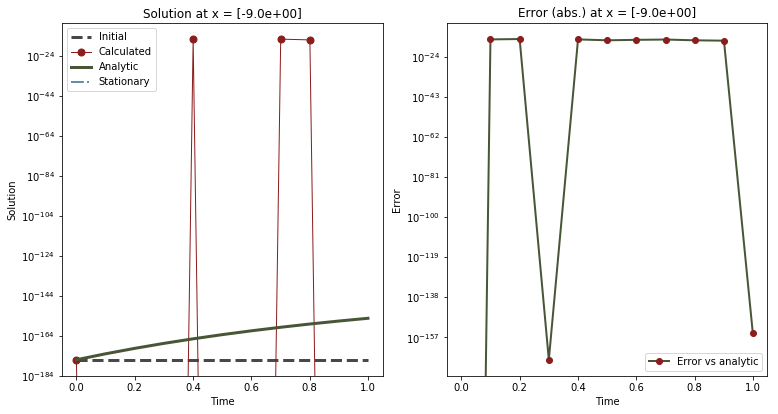

--- Solution at spatial point
X = [ 9.0e+00]


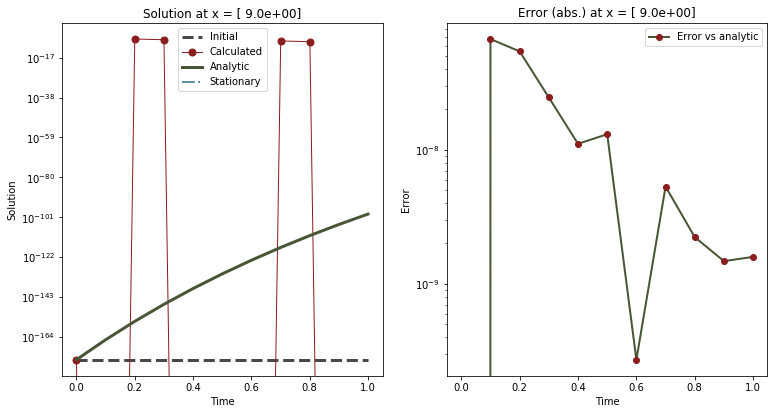

In [5]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': True, 'with_err_stat': False }
SL.plot_t(x_min, opts)
SL.plot_t(x_max, opts)

<div class="head2">
    <div class="head2__name">
        Solution in the inner points
    </div>
</div>

--- Solution at spatial point
X = [-2.6e+00]


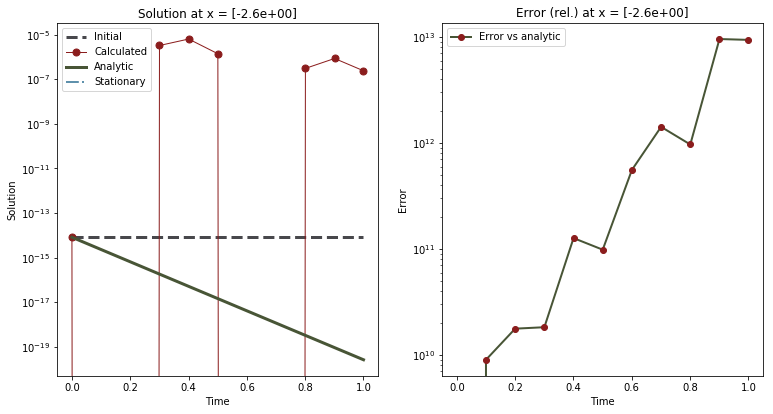

--- Solution at spatial point
X = [ 2.5e-15]


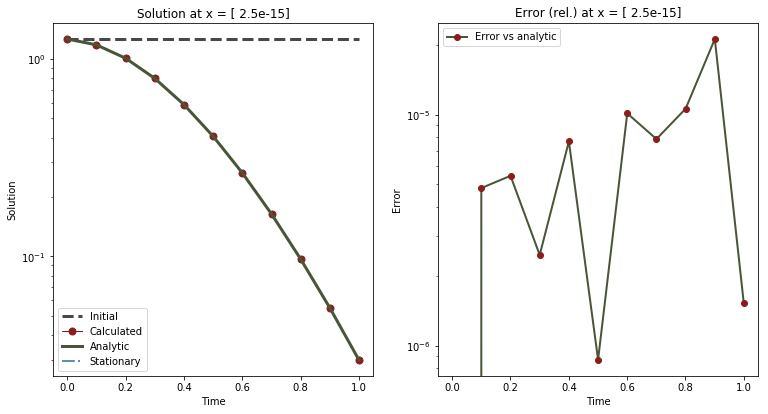

--- Solution at spatial point
X = [ 2.6e+00]


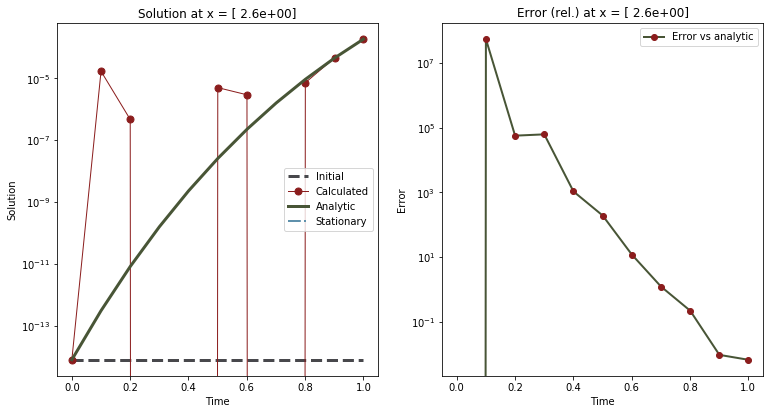

In [6]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': False }
SL.plot_t(-2.5, opts)
SL.plot_t(+0.0, opts)
SL.plot_t(+2.5, opts)

<div class="head2">
    <div class="head2__name">
        Solution for different time moments
    </div>
</div>

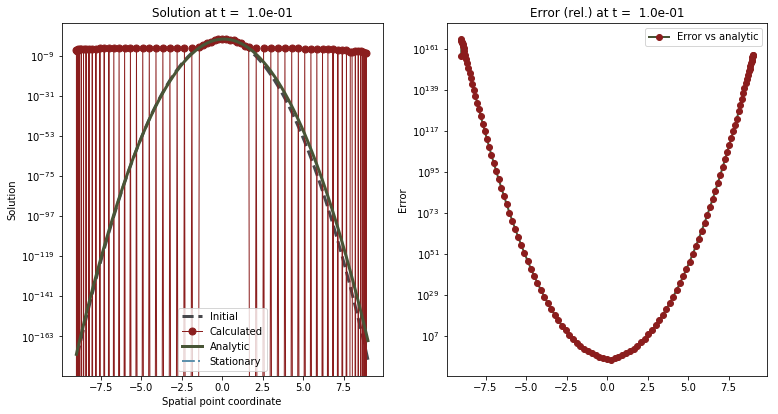

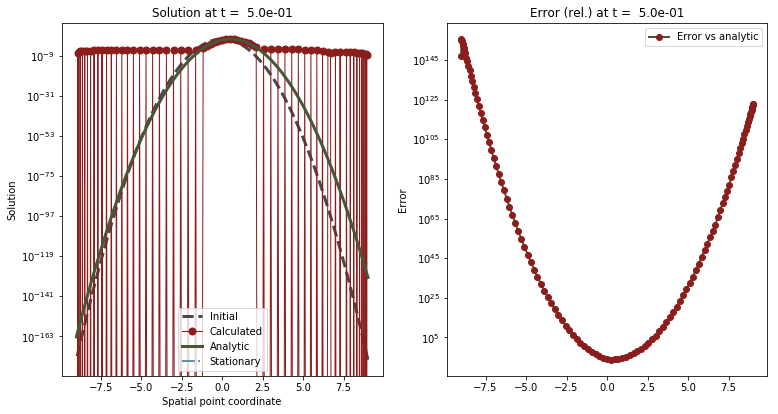

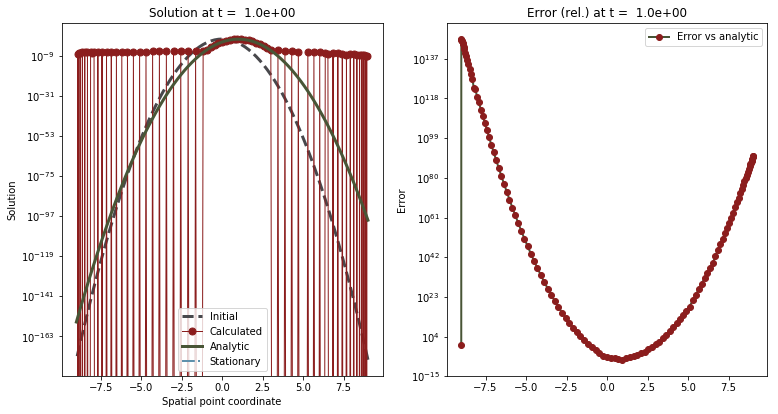

In [7]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': False }
SL.plot_x(+0.1, opts)
SL.plot_x(+0.5, opts)
SL.plot_x(None, opts)

<div class="head1">
    <div class="head1__name">
        Results for multiple computations
    </div>
    <div class="head1__note">
        We use results that already saved to file (see computations code at the end of this file).
    </div>
</div>

In [8]:
SLC = SolversCheck(data_path)
SLC.load()

name1 = 'Solver (ord=1)'
name2 = 'Solver (ord=2)'

M = SLC.res[name2]['M']
N = SLC.res[name2]['N']

m = M[-1]
n = N[-1]

<div class="head2">
    <div class="head2__name">
        Dependence on the number of time points
    </div>
    <div class="head2__note">
        We present results for NP-solver of the 2th order.
    </div>
</div>

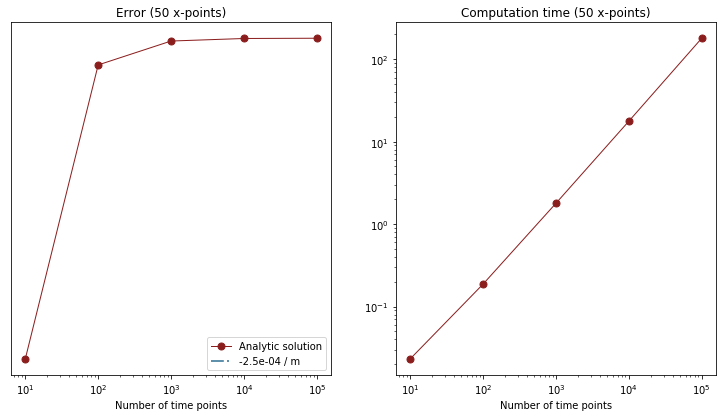

In [9]:
SLC.plot(name2, n=n, is_stat=False, is_xpoi=False, lims={ 'all': [0, None] })

<div class="head2">
    <div class="head2__name">
        Dependence on the number of spatial points
    </div>
    <div class="head2__note">
        We present results for NP-solver of the 2th order.
    </div>
</div>

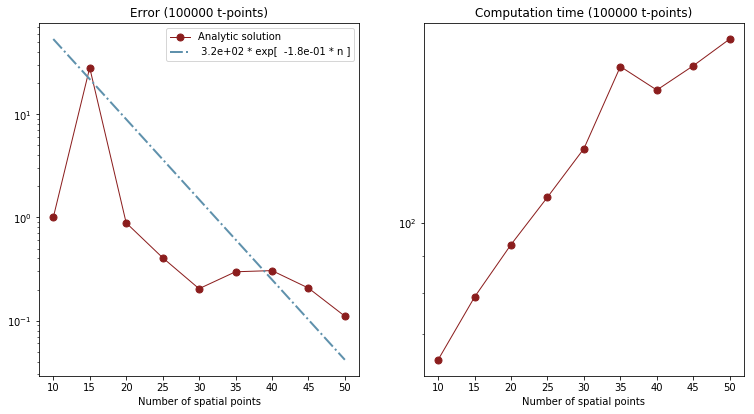

In [10]:
SLC.plot(name2, m=m, is_stat=False, is_xpoi=False, lims={ 'all': [0, None] })

<div class="head2">
    <div class="head2__name">
        Dependence on the solver order
    </div>
    <div class="head2__note">
        We present results (dependencies on the number of time and spatial points) for NP-solvers of various orders.
    </div>
</div>

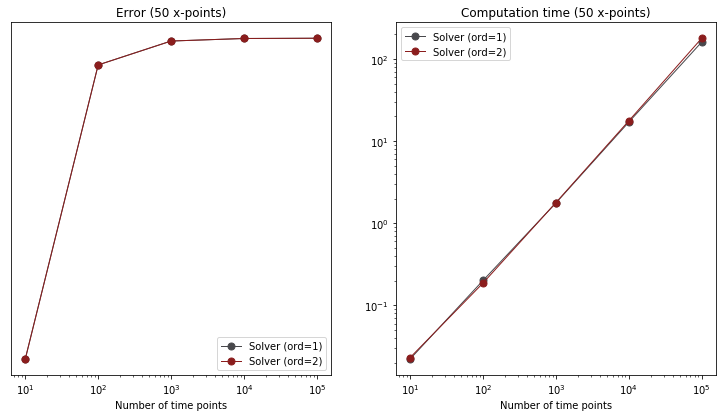

In [11]:
SLC.plot_all(n=n, is_stat=False, is_xpoi=False)

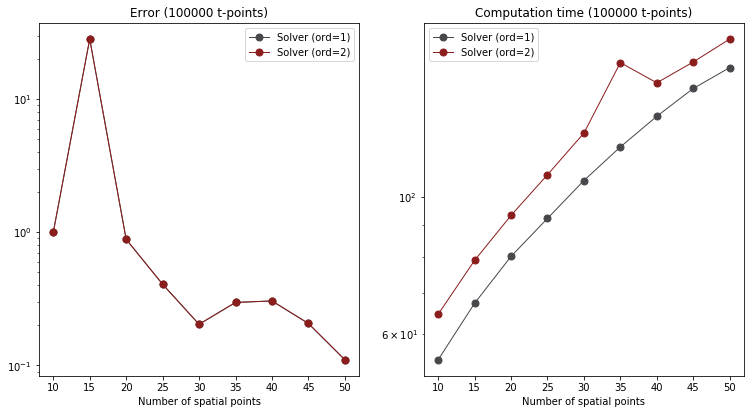

In [12]:
SLC.plot_all(m=m, is_stat=False, is_xpoi=False)

<div class="head1">
    <div class="head1__name">
        Explicit (simple) solvers
    </div>
    <div class="head1__note">
        Only for example and tests.
    </div>
</div>

In [13]:
import time
import numpy as np
import scipy.sparse as sp
from scipy.integrate import solve_ivp
from scipy.linalg import expm as expm
import matplotlib.pyplot as plt

from intertrain import Intertrain

In [14]:
d = 1
m = t_poi
n = x_poi
l = (x_max - x_min) / (x_poi - 1)
h = (t_max - t_min) / (t_poi - 1)
T = np.linspace(t_min, t_max, t_poi)

In [15]:
def show_x(X, r_calc, _time):
    X = X.reshape(1, -1)
    r_init = func_r0(X)
    r_real = func_rt(X, t_max)
    r_stat = func_rs(X)
    e = np.linalg.norm(r_real - r_calc) / np.linalg.norm(r_real)

    print('Number of spatial points : %8d'%x_poi)
    print('Number of time points    : %8d'%t_poi)
    print('Error (relative norm)    : %-12.2e'%e)
    print('Total time (sec)         : %-12.2e'%_time)
    print()
    
    plt.plot(
        X.reshape(-1), r_init, '--', label='Initial',
        linewidth=3, color='tab:blue'
    )
    plt.plot(
        X.reshape(-1), r_calc, label='Calculated',
        linewidth=1, color='tab:green', marker='o', markersize=7,
        markerfacecolor='lightgreen', markeredgecolor='g'
    )
    plt.plot(
        X.reshape(-1), r_real, label='Analytic',
        linewidth=3, color='black'
    )
    plt.plot(
        X.reshape(-1), r_stat, '--', label='Stationary',
        linewidth=2, color='magenta'
    )
    
    plt.title('Solution at the final time step')
    plt.xlabel('x')
    plt.ylabel('r')
    plt.legend(loc='best')
    plt.show()

<div class="head2">
    <div class="head2__name">
        Uniform spatial grid and the 1st order splitting
    </div>
</div>

We can solve equation on the uniform spatial grid for the time $t > 0$ with step $h$ and uniform spatial grid with step $l$ using the 2th order finite difference scheme

$$
    \frac{\partial \rho}{\partial t} = (D + Q) \rho,
$$
where
$$
    D = \frac{D_{coef}}{l^2} tridiag \left( 1, -2, 1 \right),
    \quad
    Q = \frac{1}{2 l} tridiag \left( -1, 0, 1 \right).
$$

Let apply the 1th order splitting method on the time step $(k+1)$
$$
    \frac{\partial v}{\partial t} = D v,
    \quad
    v_{k} = \rho_{k},
    \quad
    v_{k+1} = v = ?,
$$
$$
    \frac{\partial w}{\partial t} = Q w,
    \quad
    w_{k} = v,
    \quad
    w_{k+1} = \rho_{k+1} = ?,
$$
and solve both ODEs by the 1th order Euler method.

Number of spatial points :      121
Number of time points    :     1000
Error (relative norm)    : 9.59e-02    
Total time (sec)         : 2.16e-02    



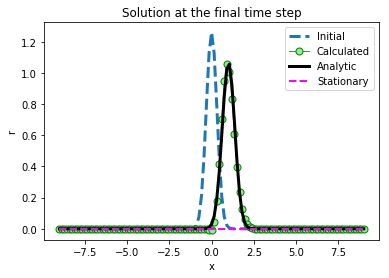

In [16]:
_time = time.time()

X = np.linspace(x_min, x_max, x_poi).reshape(1, -1)

Q = sp.spdiags([
        [-1.] * n,
        [+1.] * n
    ], [-1,  1], n, n).tocsr().toarray()
Q = Q * (-0.5 * v_coef / l)

D = sp.spdiags([
        [+1.] * x_poi,
        [-2.] * x_poi,
        [+1.] * x_poi
    ], [-1, 0, 1], x_poi, x_poi
).tocsr().toarray()
D = D * D_coef / l / l

ZD = h * D
ZQ = h * Q

r = func_r0(X)
for t in T[1:]:
    v1 = r + ZD @ r
    w1 = v1 + ZQ @ v1
    r = w1

show_x(X, r, time.time() - _time)

<div class="head2">
    <div class="head2__name">
        Uniform spatial grid and the 2st order splitting
    </div>
</div>

We can solve this equation by the same method as in the previous case but using 4th order Runge–Kutta method from the standard scipy solver and the 2th order splitting method.

Number of spatial points :      121
Number of time points    :     1000
Error (relative norm)    : 9.53e-02    
Total time (sec)         : 8.07e-01    



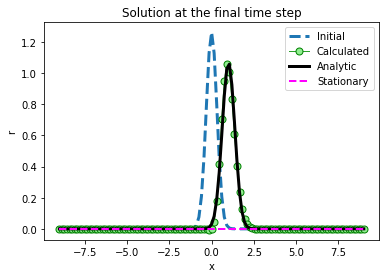

In [17]:
_time = time.time()

X = np.linspace(x_min, x_max, x_poi).reshape(1, -1)

Q = sp.spdiags([
        [-1.] * n,
        [+1.] * n
    ], [-1,  1], n, n).tocsr().toarray()
Q = Q * (-0.5 * v_coef / l)

D = sp.spdiags([
        [+1.] * x_poi,
        [-2.] * x_poi,
        [+1.] * x_poi
    ], [-1, 0, 1], x_poi, x_poi
).tocsr().toarray()
D = D * D_coef / l / l

ZD = D
ZQ = Q

def func_d(t, r):
    return ZD @ r

def func_q(t, r):
    return ZQ @ r

r = func_r0(X)
for t in T[1:]:
    v1 = solve_ivp(func_d, [t - h/2, t], r).y[:, -1]
    w1 = solve_ivp(func_q, [t - h, t], v1).y[:, -1]
    v2 = solve_ivp(func_d, [t - h/2, t], w1).y[:, -1]
    r = v2

show_x(X, r, time.time() - _time)

<div class="head2">
    <div class="head2__name">
        Uniform spatial grid and the 1st order splitting with the matrix exponential
    </div>
</div>

We can use the same approach but apply matrix exponent instead of the Euler/Runge–Kutta solver.

Number of spatial points :      121
Number of time points    :     1000
Error (relative norm)    : 9.53e-02    
Total time (sec)         : 3.22e-02    



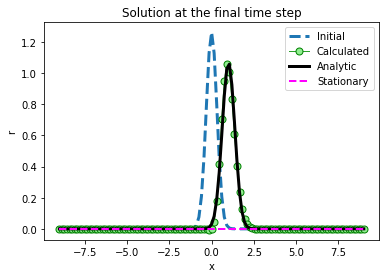

In [18]:
_time = time.time()

X = np.linspace(x_min, x_max, x_poi).reshape(1, -1)

Q = sp.spdiags([
        [-1.] * n,
        [+1.] * n
    ], [-1,  1], n, n).tocsr().toarray()
Q = Q * (-0.5 * v_coef / l)

D = sp.spdiags([
        [+1.] * x_poi,
        [-2.] * x_poi,
        [+1.] * x_poi
    ], [-1, 0, 1], x_poi, x_poi
).tocsr().toarray()
D = D * D_coef / l / l

ZD = expm(h * D)
ZQ = expm(h * Q)

r = func_r0(X)
for t in T[1:]:
    v1 = ZD @ r
    w1 = ZQ @ v1
    r = w1

show_x(X, r, time.time() - _time)

<div class="head1">
    <div class="head1__name">
        Multiple computations
    </div>
    <div class="head1__note">
        We compute dependencies of solution accuracy and calculation time on the number of time and spacial points and solver type. Results are saved to file and may be reused later for visualization.  
    </div>
</div>

In [8]:
if False: # Protection of already saved data
    SLC = SolversCheck(data_path)
    SLC.set_grid_t(t_min, t_max)
    SLC.set_grid_x(x_min, x_max)
    SLC.set_funcs(func_f0, func_f1, func_r0, func_rt, func_rs)
    SLC.set_coefs(D_coef)

    M = [10, 100, 1000, 10000, 100000]
    N = list(np.arange(10, 51, 5, dtype=int))
    SLC.add(name='Solver (ord=1)', d=1, eps=1.E-6, ord=1, with_tt=False, M=M, N=N)

    M = [10, 100, 1000, 10000, 100000]
    N = list(np.arange(10, 51, 5, dtype=int))
    SLC.add(name='Solver (ord=2)', d=1, eps=1.E-6, ord=2, with_tt=False, M=M, N=N)

    SLC.calc()
    SLC.save()

----- Calc for solver | "Solver (ord=1)"
----- Computation     | m = 10       | n = 10      


Solve: 100%|█| 9/9 [00:00<00:00, 820.64step/s, | At T=1.0e+00 : e=1.0e+00 es=8.9e-06]


----- Computation     | m = 10       | n = 15      


Solve: 100%|█| 9/9 [00:00<00:00, 674.72step/s, | At T=1.0e+00 : e=2.8e+01 es=1.2e+00]


----- Computation     | m = 10       | n = 20      


Solve: 100%|█| 9/9 [00:00<00:00, 428.04step/s, | At T=1.0e+00 : e=8.9e-01 es=1.1e-01]


----- Computation     | m = 10       | n = 25      


Solve: 100%|█| 9/9 [00:00<00:00, 498.45step/s, | At T=1.0e+00 : e=4.0e-01 es=1.2e+00]


----- Computation     | m = 10       | n = 30      


Solve: 100%|█| 9/9 [00:00<00:00, 387.80step/s, | At T=1.0e+00 : e=2.0e-01 es=5.3e-01]


----- Computation     | m = 10       | n = 35      


Solve: 100%|█| 9/9 [00:00<00:00, 346.22step/s, | At T=1.0e+00 : e=3.0e-01 es=1.2e+00]


----- Computation     | m = 10       | n = 40      


Solve: 100%|█| 9/9 [00:00<00:00, 294.19step/s, | At T=1.0e+00 : e=3.1e-01 es=8.9e-01]


----- Computation     | m = 10       | n = 45      


Solve: 100%|█| 9/9 [00:00<00:00, 367.65step/s, | At T=1.0e+00 : e=2.1e-01 es=1.2e+00]


----- Computation     | m = 10       | n = 50      


Solve: 100%|█| 9/9 [00:00<00:00, 374.19step/s, | At T=1.0e+00 : e=1.1e-01 es=1.1e+00]


----- Computation     | m = 100      | n = 10      


Solve: 100%|█| 99/99 [00:00<00:00, 1775.73step/s, | At T=1.0e+00 : e=1.0e+00 es=8.9e-06]


----- Computation     | m = 100      | n = 15      


Solve: 100%|█| 99/99 [00:00<00:00, 1194.06step/s, | At T=1.0e+00 : e=2.8e+01 es=1.2e+00]


----- Computation     | m = 100      | n = 20      


Solve: 100%|█| 99/99 [00:00<00:00, 595.94step/s, | At T=1.0e+00 : e=8.9e-01 es=1.1e-01]


----- Computation     | m = 100      | n = 25      


Solve: 100%|█| 99/99 [00:00<00:00, 657.71step/s, | At T=1.0e+00 : e=4.1e-01 es=1.2e+00]


----- Computation     | m = 100      | n = 30      


Solve: 100%|█| 99/99 [00:00<00:00, 555.58step/s, | At T=1.0e+00 : e=2.0e-01 es=5.3e-01]


----- Computation     | m = 100      | n = 35      


Solve: 100%|█| 99/99 [00:00<00:00, 688.57step/s, | At T=1.0e+00 : e=3.0e-01 es=1.2e+00]


----- Computation     | m = 100      | n = 40      


Solve: 100%|█| 99/99 [00:00<00:00, 403.67step/s, | At T=1.0e+00 : e=3.1e-01 es=8.9e-01]


----- Computation     | m = 100      | n = 45      


Solve: 100%|█| 99/99 [00:00<00:00, 382.18step/s, | At T=1.0e+00 : e=2.1e-01 es=1.2e+00]


----- Computation     | m = 100      | n = 50      


Solve: 100%|█| 99/99 [00:00<00:00, 474.21step/s, | At T=1.0e+00 : e=1.1e-01 es=1.1e+00]


----- Computation     | m = 1000     | n = 10      


Solve: 100%|█| 999/999 [00:00<00:00, 1858.81step/s, | At T=1.0e+00 : e=1.0e+00 es=8.9e-06]


----- Computation     | m = 1000     | n = 15      


Solve: 100%|█| 999/999 [00:01<00:00, 964.72step/s, | At T=1.0e+00 : e=2.8e+01 es=1.2e+00]


----- Computation     | m = 1000     | n = 20      


Solve: 100%|█| 999/999 [00:01<00:00, 914.32step/s, | At T=1.0e+00 : e=8.9e-01 es=1.1e-01]


----- Computation     | m = 1000     | n = 25      


Solve: 100%|█| 999/999 [00:00<00:00, 1029.55step/s, | At T=1.0e+00 : e=4.1e-01 es=1.2e+00]


----- Computation     | m = 1000     | n = 30      


Solve: 100%|█| 999/999 [00:01<00:00, 905.28step/s, | At T=1.0e+00 : e=2.0e-01 es=5.3e-01]


----- Computation     | m = 1000     | n = 35      


Solve: 100%|█| 999/999 [00:01<00:00, 784.13step/s, | At T=1.0e+00 : e=3.0e-01 es=1.2e+00]


----- Computation     | m = 1000     | n = 40      


Solve: 100%|█| 999/999 [00:01<00:00, 723.12step/s, | At T=1.0e+00 : e=3.1e-01 es=8.9e-01]


----- Computation     | m = 1000     | n = 45      


Solve: 100%|█| 999/999 [00:01<00:00, 661.94step/s, | At T=1.0e+00 : e=2.1e-01 es=1.2e+00]


----- Computation     | m = 1000     | n = 50      


Solve: 100%|█| 999/999 [00:01<00:00, 558.18step/s, | At T=1.0e+00 : e=1.1e-01 es=1.1e+00]


----- Computation     | m = 10000    | n = 10      


Solve: 100%|█| 9999/9999 [00:05<00:00, 1988.33step/s, | At T=1.0e+00 : e=1.0e+00 es=8.9e-06]


----- Computation     | m = 10000    | n = 15      


Solve: 100%|█| 9999/9999 [00:06<00:00, 1578.60step/s, | At T=1.0e+00 : e=2.8e+01 es=1.2e+00]


----- Computation     | m = 10000    | n = 20      


Solve: 100%|█| 9999/9999 [00:07<00:00, 1285.04step/s, | At T=1.0e+00 : e=8.9e-01 es=1.1e-01]


----- Computation     | m = 10000    | n = 25      


Solve: 100%|█| 9999/9999 [00:09<00:00, 1085.77step/s, | At T=1.0e+00 : e=4.1e-01 es=1.2e+00]


----- Computation     | m = 10000    | n = 30      


Solve: 100%|█| 9999/9999 [00:10<00:00, 927.08step/s, | At T=1.0e+00 : e=2.0e-01 es=5.3e-01]


----- Computation     | m = 10000    | n = 35      


Solve: 100%|█| 9999/9999 [00:12<00:00, 828.59step/s, | At T=1.0e+00 : e=3.0e-01 es=1.2e+00]


----- Computation     | m = 10000    | n = 40      


Solve: 100%|█| 9999/9999 [00:13<00:00, 733.14step/s, | At T=1.0e+00 : e=3.1e-01 es=8.9e-01]


----- Computation     | m = 10000    | n = 45      


Solve: 100%|█| 9999/9999 [00:15<00:00, 660.52step/s, | At T=1.0e+00 : e=2.1e-01 es=1.2e+00]


----- Computation     | m = 10000    | n = 50      


Solve: 100%|█| 9999/9999 [00:17<00:00, 578.86step/s, | At T=1.0e+00 : e=1.1e-01 es=1.1e+00]


----- Computation     | m = 100000   | n = 10      


Solve: 100%|█| 99999/99999 [00:55<00:00, 1805.37step/s, | At T=1.0e+00 : e=1.0e+00 es=8.9e-06]


----- Computation     | m = 100000   | n = 15      


Solve: 100%|█| 99999/99999 [01:08<00:00, 1466.67step/s, | At T=1.0e+00 : e=2.8e+01 es=1.2e+00]


----- Computation     | m = 100000   | n = 20      


Solve: 100%|█| 99999/99999 [01:21<00:00, 1233.26step/s, | At T=1.0e+00 : e=8.9e-01 es=1.1e-01]


----- Computation     | m = 100000   | n = 25      


Solve: 100%|█| 99999/99999 [01:33<00:00, 1071.90step/s, | At T=1.0e+00 : e=4.1e-01 es=1.2e+00]


----- Computation     | m = 100000   | n = 30      


Solve: 100%|█| 99999/99999 [01:47<00:00, 931.35step/s, | At T=1.0e+00 : e=2.0e-01 es=5.3e-01]


----- Computation     | m = 100000   | n = 35      


Solve: 100%|█| 99999/99999 [02:01<00:00, 822.39step/s, | At T=1.0e+00 : e=3.0e-01 es=1.2e+00]


----- Computation     | m = 100000   | n = 40      


Solve: 100%|█| 99999/99999 [02:16<00:00, 733.92step/s, | At T=1.0e+00 : e=3.1e-01 es=8.9e-01]


----- Computation     | m = 100000   | n = 45      


Solve: 100%|█| 99999/99999 [02:31<00:00, 662.13step/s, | At T=1.0e+00 : e=2.1e-01 es=1.2e+00]


----- Computation     | m = 100000   | n = 50      


Solve: 100%|█| 99999/99999 [02:43<00:00, 612.95step/s, | At T=1.0e+00 : e=1.1e-01 es=1.1e+00]


----- Done            | Time : 1.13e+03 sec
----- Calc for solver | "Solver (ord=2)"
----- Computation     | m = 10       | n = 10      


Solve: 100%|█| 9/9 [00:00<00:00, 734.68step/s, | At T=1.0e+00 : e=1.0e+00 es=8.9e-06]


----- Computation     | m = 10       | n = 15      


Solve: 100%|█| 9/9 [00:00<00:00, 681.35step/s, | At T=1.0e+00 : e=2.8e+01 es=1.2e+00]


----- Computation     | m = 10       | n = 20      


Solve: 100%|█| 9/9 [00:00<00:00, 569.59step/s, | At T=1.0e+00 : e=8.9e-01 es=1.1e-01]


----- Computation     | m = 10       | n = 25      


Solve: 100%|█| 9/9 [00:00<00:00, 615.25step/s, | At T=1.0e+00 : e=4.0e-01 es=1.2e+00]


----- Computation     | m = 10       | n = 30      


Solve: 100%|█| 9/9 [00:00<00:00, 520.86step/s, | At T=1.0e+00 : e=2.0e-01 es=5.3e-01]


----- Computation     | m = 10       | n = 35      


Solve: 100%|█| 9/9 [00:00<00:00, 398.05step/s, | At T=1.0e+00 : e=3.0e-01 es=1.2e+00]


----- Computation     | m = 10       | n = 40      


Solve: 100%|█| 9/9 [00:00<00:00, 391.39step/s, | At T=1.0e+00 : e=3.1e-01 es=8.9e-01]


----- Computation     | m = 10       | n = 45      


Solve: 100%|█| 9/9 [00:00<00:00, 360.94step/s, | At T=1.0e+00 : e=2.1e-01 es=1.2e+00]


----- Computation     | m = 10       | n = 50      


Solve: 100%|█| 9/9 [00:00<00:00, 366.85step/s, | At T=1.0e+00 : e=1.1e-01 es=1.1e+00]


----- Computation     | m = 100      | n = 10      


Solve: 100%|█| 99/99 [00:00<00:00, 1454.05step/s, | At T=1.0e+00 : e=1.0e+00 es=8.9e-06]


----- Computation     | m = 100      | n = 15      


Solve: 100%|█| 99/99 [00:00<00:00, 1160.69step/s, | At T=1.0e+00 : e=2.8e+01 es=1.2e+00]


----- Computation     | m = 100      | n = 20      


Solve: 100%|█| 99/99 [00:00<00:00, 900.28step/s, | At T=1.0e+00 : e=8.9e-01 es=1.1e-01]


----- Computation     | m = 100      | n = 25      


Solve: 100%|█| 99/99 [00:00<00:00, 874.23step/s, | At T=1.0e+00 : e=4.1e-01 es=1.2e+00]


----- Computation     | m = 100      | n = 30      


Solve: 100%|█| 99/99 [00:00<00:00, 800.23step/s, | At T=1.0e+00 : e=2.0e-01 es=5.3e-01]


----- Computation     | m = 100      | n = 35      


Solve: 100%|█| 99/99 [00:00<00:00, 660.86step/s, | At T=1.0e+00 : e=3.0e-01 es=1.2e+00]


----- Computation     | m = 100      | n = 40      


Solve: 100%|█| 99/99 [00:00<00:00, 619.24step/s, | At T=1.0e+00 : e=3.1e-01 es=8.9e-01]


----- Computation     | m = 100      | n = 45      


Solve: 100%|█| 99/99 [00:00<00:00, 555.95step/s, | At T=1.0e+00 : e=2.1e-01 es=1.2e+00]


----- Computation     | m = 100      | n = 50      


Solve: 100%|█| 99/99 [00:00<00:00, 522.91step/s, | At T=1.0e+00 : e=1.1e-01 es=1.1e+00]


----- Computation     | m = 1000     | n = 10      


Solve: 100%|█| 999/999 [00:00<00:00, 1535.40step/s, | At T=1.0e+00 : e=1.0e+00 es=8.9e-06]


----- Computation     | m = 1000     | n = 15      


Solve: 100%|█| 999/999 [00:00<00:00, 1251.23step/s, | At T=1.0e+00 : e=2.8e+01 es=1.2e+00]


----- Computation     | m = 1000     | n = 20      


Solve: 100%|█| 999/999 [00:00<00:00, 1026.30step/s, | At T=1.0e+00 : e=8.9e-01 es=1.1e-01]


----- Computation     | m = 1000     | n = 25      


Solve: 100%|█| 999/999 [00:01<00:00, 929.71step/s, | At T=1.0e+00 : e=4.1e-01 es=1.2e+00]


----- Computation     | m = 1000     | n = 30      


Solve: 100%|█| 999/999 [00:01<00:00, 817.68step/s, | At T=1.0e+00 : e=2.0e-01 es=5.3e-01]


----- Computation     | m = 1000     | n = 35      


Solve: 100%|█| 999/999 [00:01<00:00, 728.95step/s, | At T=1.0e+00 : e=3.0e-01 es=1.2e+00]


----- Computation     | m = 1000     | n = 40      


Solve: 100%|█| 999/999 [00:01<00:00, 582.28step/s, | At T=1.0e+00 : e=3.1e-01 es=8.9e-01]


----- Computation     | m = 1000     | n = 45      


Solve: 100%|█| 999/999 [00:01<00:00, 604.28step/s, | At T=1.0e+00 : e=2.1e-01 es=1.2e+00]


----- Computation     | m = 1000     | n = 50      


Solve: 100%|█| 999/999 [00:01<00:00, 552.87step/s, | At T=1.0e+00 : e=1.1e-01 es=1.1e+00]


----- Computation     | m = 10000    | n = 10      


Solve: 100%|█| 9999/9999 [00:06<00:00, 1529.67step/s, | At T=1.0e+00 : e=1.0e+00 es=8.9e-06]


----- Computation     | m = 10000    | n = 15      


Solve: 100%|█| 9999/9999 [00:07<00:00, 1255.40step/s, | At T=1.0e+00 : e=2.8e+01 es=1.2e+00]


----- Computation     | m = 10000    | n = 20      


Solve: 100%|█| 9999/9999 [00:09<00:00, 1073.62step/s, | At T=1.0e+00 : e=8.9e-01 es=1.1e-01]


----- Computation     | m = 10000    | n = 25      


Solve: 100%|█| 9999/9999 [00:10<00:00, 932.40step/s, | At T=1.0e+00 : e=4.1e-01 es=1.2e+00]


----- Computation     | m = 10000    | n = 30      


Solve: 100%|█| 9999/9999 [00:12<00:00, 811.42step/s, | At T=1.0e+00 : e=2.0e-01 es=5.3e-01]


----- Computation     | m = 10000    | n = 35      


Solve: 100%|█| 9999/9999 [00:13<00:00, 714.46step/s, | At T=1.0e+00 : e=3.0e-01 es=1.2e+00]


----- Computation     | m = 10000    | n = 40      


Solve: 100%|█| 9999/9999 [00:15<00:00, 657.83step/s, | At T=1.0e+00 : e=3.1e-01 es=8.9e-01]


----- Computation     | m = 10000    | n = 45      


Solve: 100%|█| 9999/9999 [00:16<00:00, 603.49step/s, | At T=1.0e+00 : e=2.1e-01 es=1.2e+00]


----- Computation     | m = 10000    | n = 50      


Solve: 100%|█| 9999/9999 [00:17<00:00, 561.28step/s, | At T=1.0e+00 : e=1.1e-01 es=1.1e+00]


----- Computation     | m = 100000   | n = 10      


Solve: 100%|█| 99999/99999 [01:05<00:00, 1528.44step/s, | At T=1.0e+00 : e=1.0e+00 es=8.9e-06]


----- Computation     | m = 100000   | n = 15      


Solve: 100%|█| 99999/99999 [01:19<00:00, 1252.15step/s, | At T=1.0e+00 : e=2.8e+01 es=1.2e+00]


----- Computation     | m = 100000   | n = 20      


Solve: 100%|█| 99999/99999 [01:34<00:00, 1059.55step/s, | At T=1.0e+00 : e=8.9e-01 es=1.1e-01]


----- Computation     | m = 100000   | n = 25      


Solve: 100%|█| 99999/99999 [01:49<00:00, 911.59step/s, | At T=1.0e+00 : e=4.1e-01 es=1.2e+00]


----- Computation     | m = 100000   | n = 30      


Solve: 100%|█| 99999/99999 [02:08<00:00, 780.91step/s, | At T=1.0e+00 : e=2.0e-01 es=5.3e-01]


----- Computation     | m = 100000   | n = 35      


Solve: 100%|█| 99999/99999 [02:46<00:00, 600.51step/s, | At T=1.0e+00 : e=3.0e-01 es=1.2e+00]


----- Computation     | m = 100000   | n = 40      


Solve: 100%|█| 99999/99999 [02:34<00:00, 648.36step/s, | At T=1.0e+00 : e=3.1e-01 es=8.9e-01]


----- Computation     | m = 100000   | n = 45      


Solve: 100%|█| 99999/99999 [02:46<00:00, 600.14step/s, | At T=1.0e+00 : e=2.1e-01 es=1.2e+00]


----- Computation     | m = 100000   | n = 50      


Solve: 100%|█| 99999/99999 [03:01<00:00, 551.04step/s, | At T=1.0e+00 : e=1.1e-01 es=1.1e+00]


----- Done            | Time : 1.32e+03 sec


<div class="end"></div>